In [39]:
import numpy
import pandas
import tensorflow
import keras
from matplotlib import pyplot
import seaborn
import itertools

%matplotlib inline

In [40]:
# CLASSIFIER PARAMETERS
my_vars = ['petallength', 'petalwidth']
class_col = 'flower'
my_class = 'Iris-versicolor'

# SELECTION FROM IRIS DATAFRAME
my_vars_w_class = my_vars.copy()
my_vars_w_class.append(class_col)

In [41]:
iris = pandas.read_csv('iris.data')
iris = iris[my_vars_w_class]

In [42]:
iris.head(5)

,petallength,petalwidth,flower
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


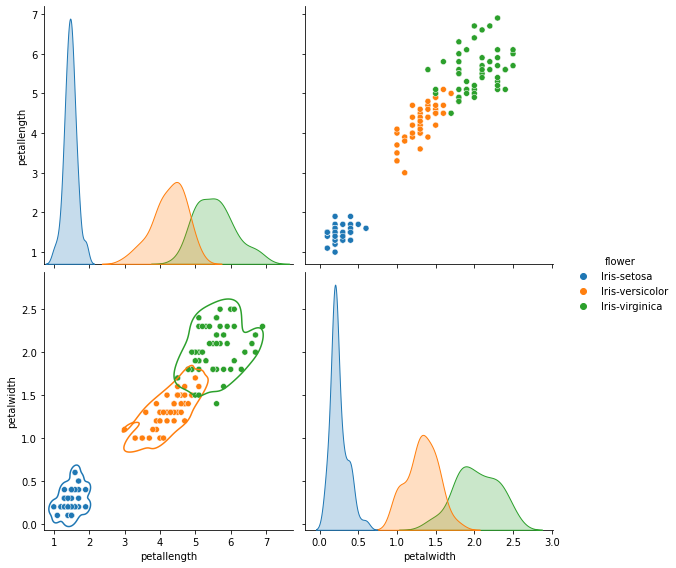

In [43]:
g = seaborn.pairplot(iris, hue='flower', height=4, diag_kind='kde')
_ = g.map_lower(seaborn.kdeplot, levels=1, color=".1")

In [44]:
# PREPARING Xn and Yn
X = iris[my_vars].to_numpy()
Y = (iris['flower'] == my_class).astype(int).to_numpy()[:, numpy.newaxis]

In [45]:
# BUILDING THE MODEL WITH THE SEQUENTIAL API
# my_net = keras.Sequential()
inputs = keras.Input(shape=(len(my_vars), ))
outputs = keras.layers.Dense(1, activation='sigmoid')(inputs)
model_name = '{}_classifier'.format(my_class)
my_net = keras.Model(inputs=inputs, outputs=outputs, name=model_name)
my_net.summary()

Model: "Iris-versicolor_classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [64]:
# TRAINING THE MODEL
#optimizer = tensorflow.keras.optimizers.RMSprop(learning_rate=0.01)
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.01)
my_net.compile(optimizer=optimizer, loss='mse', metrics=['Precision'])
# es = tensorflow.keras.callbacks.EarlyStopping(monitor='val_precision', mode='max', patience=1000)
history = my_net.fit(X, Y, batch_size=X.shape[0], epochs=500, validation_split = 0.3, verbose=1) # , callbacks=[es])

ecision: 0.0000e+00
Epoch 366/500
1/1 [==============================] - 0s 20ms/step - loss: 0.0476 - precision: 0.9091 - val_loss: 1.0000 - val_precision: 0.0000e+00
Epoch 367/500
1/1 [==============================] - 0s 24ms/step - loss: 0.0476 - precision: 0.9091 - val_loss: 1.0000 - val_precision: 0.0000e+00
Epoch 368/500
1/1 [==============================] - 0s 24ms/step - loss: 0.0476 - precision: 0.9091 - val_loss: 1.0000 - val_precision: 0.0000e+00
Epoch 369/500
1/1 [==============================] - 0s 23ms/step - loss: 0.0476 - precision: 0.9091 - val_loss: 1.0000 - val_precision: 0.0000e+00
Epoch 370/500
1/1 [==============================] - 0s 19ms/step - loss: 0.0476 - precision: 0.9091 - val_loss: 1.0000 - val_precision: 0.0000e+00
Epoch 371/500
1/1 [==============================] - 0s 19ms/step - loss: 0.0476 - precision: 0.9091 - val_loss: 1.0000 - val_precision: 0.0000e+00
Epoch 372/500
1/1 [==============================] - 0s 23ms/step - loss: 0.0476 - precision

In [65]:
# CLASS COLOR GRID & CLASS EVALUATION
grid_n_points = 100
class_threshold = 0.5
little_delta = 0.1

x0_grid = numpy.linspace(X[:, 0].min(), X[:, 0].max(), grid_n_points)
x1_grid = numpy.linspace(X[:, 1].min(), X[:, 1].max(), grid_n_points)
X_g = numpy.array(list(itertools.product(x0_grid, x1_grid)))
Y_g = my_net.predict(X_g)
Y_est = (my_net.predict(X) > class_threshold).astype(int)
t_error, t_precision = my_net.evaluate(X, Y, verbose=0)

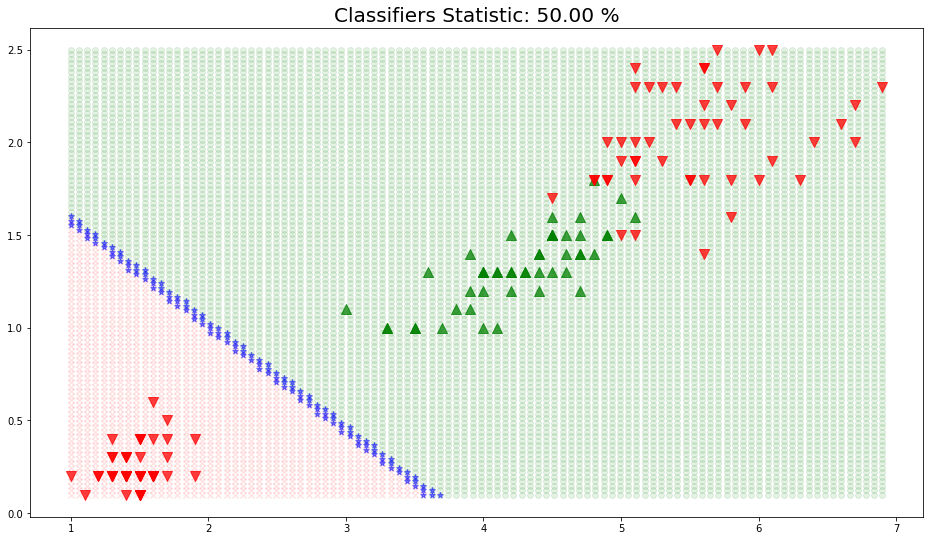

In [66]:
# CLASSIFICATION FIGURE
fig = pyplot.figure(figsize=(16, 9))
ax = fig.add_subplot(111)
# PLOT CLASS REGION
ix_class_region = Y_g.reshape(-1) > class_threshold
ix_class_points = Y.reshape(-1) == 1
ix_surface = (Y_g.reshape(-1) >= class_threshold - little_delta) &  (Y_g.reshape(-1) <= class_threshold + little_delta)
_ = ax.scatter(X_g[ix_class_region, 0], X_g[ix_class_region, 1], marker='o', color='green', alpha=0.1)
_ = ax.scatter(X_g[~ix_class_region, 0], X_g[~ix_class_region, 1], marker='x', color='red', alpha=0.1)
_ = ax.scatter(X_g[ix_surface, 0], X_g[ix_surface, 1], marker='*', color='blue', alpha=0.5)
_ = ax.scatter(X[ix_class_points, 0], X[ix_class_points, 1], marker='^', color='green', alpha=0.75, s=100)
_ = ax.scatter(X[~ix_class_points, 0], X[~ix_class_points, 1], marker='v', color='red', alpha=0.75, s=100)
_ = ax.set_title('Classifiers {}: {:.2f} %'.format('Statistic', 100*t_precision), size=20)

In [49]:
numpy.unique(Y_g)

array([0.3011436 , 0.30141872, 0.30169398, ..., 0.54936963, 0.54969317,
       0.55001664], dtype=float32)